# Modelado de datos

## Vistazo a la base de datos cruda (raw)

In [1]:
#Importación de librerías
import numpy as np
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt

In [2]:
#Lectura de archivo fuente
df1 = pd.read_csv('./Ask A Manager Salary Survey 2021 (Responses) - Form Responses 1.csv')
df1.head(5)

,Timestamp,How old are you?,Industry,Job title,Additional context on job title,Annual salary,Other monetary comp,Currency,Currency - other,Additional context on income,Country,State,City,Overall years of professional experience,Years of experience in field,Highest level of education completed,Gender,Race
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,"55,000",0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,"54,600",4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,"34,000",NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,"62,000",3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,"60,000",7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White


In [3]:
#Dimensiones originales de dataset
df1.shape

(27663, 18)

In [4]:
#Variables de dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27663 entries, 0 to 27662
Data columns (total 18 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Timestamp                                 27663 non-null  object 
 1   How old are you?                          27663 non-null  object 
 2   Industry                                  27594 non-null  object 
 3   Job title                                 27663 non-null  object 
 4   Additional context on job title           7158 non-null   object 
 5   Annual salary                             27663 non-null  object 
 6   Other monetary comp                       20505 non-null  float64
 7   Currency                                  27663 non-null  object 
 8   Currency - other                          185 non-null    object 
 9   Additional context on income              3011 non-null   object 
 10  Country                           

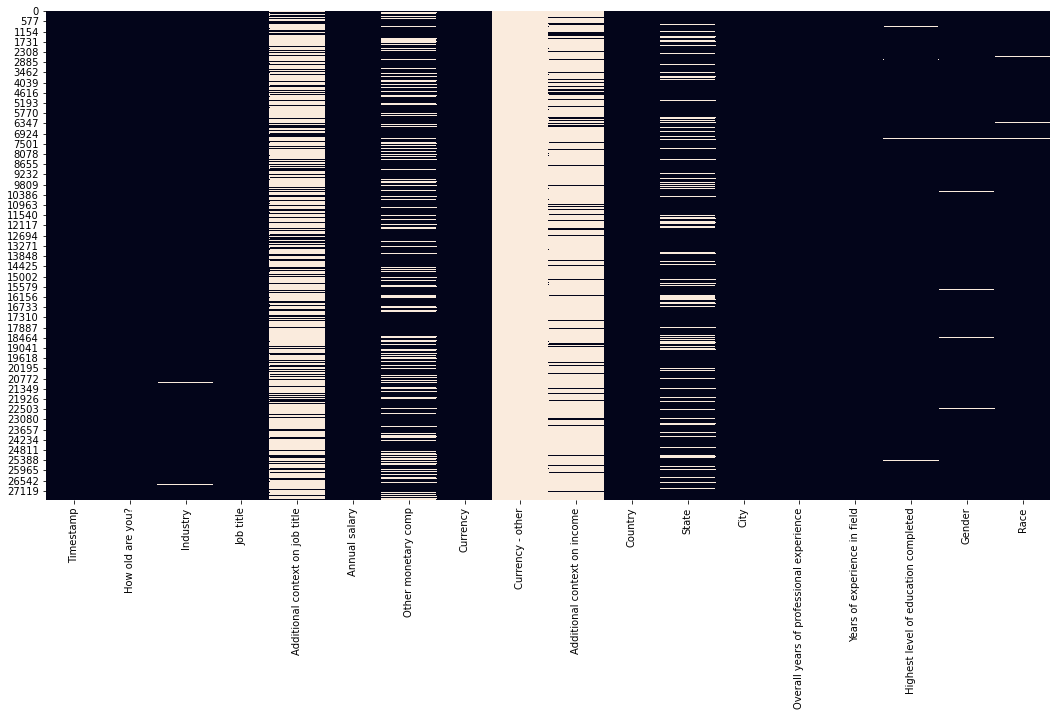

In [5]:
#Vistazo general de datos faltantes
plt.figure(figsize=(18, 9))
sns.heatmap(df1.isnull(), cbar=False)
plt.show()

In [6]:
#Vistazo a valores únicos por variable
for i in df1:
    print(df1.groupby(i).size(), '\n')

Timestamp
1/11/2022 13:26:41    1
1/11/2022 14:27:43    1
1/11/2022 16:30:23    1
1/13/2022 19:34:47    1
1/13/2022 2:35:05     1
                     ..
9/9/2021 12:39:15     1
9/9/2021 14:12:16     1
9/9/2021 15:26:03     1
9/9/2021 15:32:29     1
9/9/2021 22:32:16     1
Length: 24881, dtype: int64 

How old are you?
18-24          1159
25-34         12467
35-44          9805
45-54          3151
55-64           981
65 or over       89
under 18         11
dtype: int64 

Industry
 Buyer                                1
 Veterinary medicine                  1
"Government Relations" (Lobbying)     1
Academia                              4
Academia                              1
                                     ..
trade association/membership          1
translation                           1
veterinary biotech                    1
video games                           1
wholesale distribution                3
Length: 1198, dtype: int64 

Job title
 Analyst                     1
 Busi

## Limpieza de variable Country

In [7]:
#Detalle valores únicos Country
lst = pd.unique(df1['Country'].str.lower().str.strip())
print(len(lst.tolist()))
print(lst.tolist())

250
['united states', 'united kingdom', 'us', 'usa', 'canada', 'uk', 'scotland', 'u.s.', 'the netherlands', 'australia', 'spain', 'england', 'finland', 'united states of america', 'france', 'germany', 'ireland', 'india', 'u.s>', 'isa', 'argentina', 'great britain', 'united state', 'u.s.a', 'denmark', 'u.s.a.', 'america', 'netherlands', 'switzerland', 'bermuda', 'the united states', 'united state of america', 'malaysia', 'mexico', 'united stated', 'south africa', 'belgium', 'northern ireland', 'sweden', 'hong kong', 'kuwait', 'norway', 'sri lanka', 'contracts', 'usa-- virgin islands', 'united statws', 'england/uk', 'u.s', "we don't get raises, we get quarterly bonuses, but they periodically asses income in the area you work, so i got a raise because a 3rd party assessment showed i was paid too little for the area we were located", 'unites states', 'england, uk.', 'greece', 'japan', 'u. s.', 'britain', 'united sates', 'austria', 'brazil', 'canada, ottawa, ontario', 'global', 'united stat

In [8]:
#Limpieza variable Country
lst = pd.unique( \
      df1['Country'].str.lower().str.strip() \
      .replace('((.)*u(.)*s(.)*)|(^america$)|(🇺🇸)|(^isa$)|(^y$)|(united y)','US',regex=True) \
      .replace('(.)*u(.)*k(.)*','UK',regex=True) \
      .replace('(.)*canad(.)*','CANADA',regex=True) \
      .replace('(.)*engl(.)*','ENGLAND',regex=True) \
      .replace('(.)*ital(.)*','ITALY',regex=True) \
      .replace('(.)*nether(.)*','NETHERLANDS',regex=True) \
      .replace('(.)*german(.)*','GERMANY',regex=True) \
      .replace('(.)*new(.)*ze(.)*','NEW ZEALAND',regex=True) \
      .replace('(.)*remote(.)*','REMOTE',regex=True) \
      .replace('\.','',regex=True) \
      #.str.upper() \
    )
print(len(lst.tolist()))
print(lst.tolist())

123
['US', 'UK', 'CANADA', 'scotland', 'NETHERLANDS', 'spain', 'ENGLAND', 'finland', 'france', 'GERMANY', 'ireland', 'india', 'argentina', 'great britain', 'denmark', 'switzerland', 'bermuda', 'malaysia', 'mexico', 'south africa', 'belgium', 'northern ireland', 'sweden', 'hong kong', 'kuwait', 'norway', 'sri lanka', 'contracts', 'greece', 'japan', 'britain', 'brazil', 'global', 'hungary', 'luxembourg', 'colombia', 'NEW ZEALAND', 'trinidad and tobago', 'cayman islands', 'can', 'ua', 'czech republic', 'czechia', 'latvia', 'puerto rico', 'rwanda', 'bangladesh', 'romania', 'currently finance', 'serbia', 'philippines', 'poland', 'uxz', 'canda', 'catalonia', 'ITALY', 'jersey, channel islands', 'china', 'virginia', 'afghanistan', 'israel', 'hartford', 'csnada', 'mainland china', 'is', 'nz', 'taiwan', 'cambodia', 'vietnam', 'REMOTE', 'singapore', 'thailand', 'lithuania', 'eritrea', 'indonesia', 'cuba', 'slovenia', "cote d'ivoire", 'somalia', 'danmark', 'nl', 'nederland', 'slovakia', 'portugal'

In [9]:
#Persistencia de variable Country limpia en dataframe
df1['Country'] = df1['Country'].str.lower().str.strip() \
      .replace('((.)*u(.)*s(.)*)|(^america$)|(🇺🇸)|(^isa$)|(^y$)|(united y)','US',regex=True) \
      .replace('(.)*u(.)*k(.)*','UK',regex=True) \
      .replace('(.)*canad(.)*','CANADA',regex=True) \
      .replace('(.)*engl(.)*','ENGLAND',regex=True) \
      .replace('(.)*ital(.)*','ITALY',regex=True) \
      .replace('(.)*nether(.)*','NETHERLANDS',regex=True) \
      .replace('(.)*german(.)*','GERMANY',regex=True) \
      .replace('(.)*new(.)*ze(.)*','NEW ZEALAND',regex=True) \
      .replace('(.)*remote(.)*','REMOTE',regex=True) \
      .replace('\.','',regex=True) \
      .str.upper() 
print(len(pd.unique(df1['Country'])))
print(pd.unique(df1['Country']))

123
['US' 'UK' 'CANADA' 'SCOTLAND' 'NETHERLANDS' 'SPAIN' 'ENGLAND' 'FINLAND'
 'FRANCE' 'GERMANY' 'IRELAND' 'INDIA' 'ARGENTINA' 'GREAT BRITAIN'
 'DENMARK' 'SWITZERLAND' 'BERMUDA' 'MALAYSIA' 'MEXICO' 'SOUTH AFRICA'
 'BELGIUM' 'NORTHERN IRELAND' 'SWEDEN' 'HONG KONG' 'KUWAIT' 'NORWAY'
 'SRI LANKA' 'CONTRACTS' 'GREECE' 'JAPAN' 'BRITAIN' 'BRAZIL' 'GLOBAL'
 'HUNGARY' 'LUXEMBOURG' 'COLOMBIA' 'NEW ZEALAND' 'TRINIDAD AND TOBAGO'
 'CAYMAN ISLANDS' 'CAN' 'UA' 'CZECH REPUBLIC' 'CZECHIA' 'LATVIA'
 'PUERTO RICO' 'RWANDA' 'BANGLADESH' 'ROMANIA' 'CURRENTLY FINANCE'
 'SERBIA' 'PHILIPPINES' 'POLAND' 'UXZ' 'CANDA' 'CATALONIA' 'ITALY'
 'JERSEY, CHANNEL ISLANDS' 'CHINA' 'VIRGINIA' 'AFGHANISTAN' 'ISRAEL'
 'HARTFORD' 'CSNADA' 'MAINLAND CHINA' 'IS' 'NZ' 'TAIWAN' 'CAMBODIA'
 'VIETNAM' 'REMOTE' 'SINGAPORE' 'THAILAND' 'LITHUANIA' 'ERITREA'
 'INDONESIA' 'CUBA' 'SLOVENIA' "COTE D'IVOIRE" 'SOMALIA' 'DANMARK' 'NL'
 'NEDERLAND' 'SLOVAKIA' 'PORTUGAL' 'SIERRA LEONE' 'UAE' 'INTERNATIONAL'
 'THE BAHAMAS' 'WALES' 'COSTA RI

## Limpieza variable Currency

In [10]:
#Detalle valores únicos Currency - other
lst = pd.unique(df1['Currency'].str.lower().str.strip())
print(len(lst.tolist()))
print(lst.tolist())

11
['usd', 'gbp', 'cad', 'eur', 'aud/nzd', 'other', 'chf', 'zar', 'sek', 'hkd', 'jpy']


In [11]:
#Limpieza variable Currency - other
lst = pd.unique( \
      df1['Currency'].str.lower().str.strip() \
        .replace('(.)*(aud)(.)*','AUD',regex=True) \
)
lst.tolist()
print(len(lst.tolist()))
print(lst.tolist())

11
['usd', 'gbp', 'cad', 'eur', 'AUD', 'other', 'chf', 'zar', 'sek', 'hkd', 'jpy']


In [12]:
#Persistencia de variable Currency - other limpia en dataframe
df1['Currency'] = df1['Currency'].str.lower().str.strip() \
        .replace('(.)*(aud)(.)*','AUD',regex=True) \
        .str.upper() 
print(len(pd.unique(df1['Currency'])))
print(pd.unique(df1['Currency']))

11
['USD' 'GBP' 'CAD' 'EUR' 'AUD' 'OTHER' 'CHF' 'ZAR' 'SEK' 'HKD' 'JPY']


## Limpieza variable Currency - other

In [13]:
#Detalle valores únicos Currency - other
lst = pd.unique(df1['Currency - other'].str.lower().str.strip())
print(len(lst.tolist()))
print(lst.tolist())

98
[nan, 'inr', 'peso argentino', '$76,302.34', 'my bonus is based on performance up to 10% of salary', 'i work for an online state university, managing admissions data. not direct tech support.', '0', 'myr', 'chf', 'kwd', 'nok', 'na', 'usd', 'br$', 'sek', 'base plus commission', 'canadian', 'dkk', 'eur', 'cop', 'ttd', 'indian rupees', 'brl (r$)', 'mexican pesos', 'czk', 'gbp', 'bdt', 'rsu / equity', 'zar', 'additonal = bonus plus stock', 'american dollars', 'php', 'pln (polish zloty)', 'overtime (about 5 hours a week) and bonus', 'czech crowns', 'stock', 'try', 'norwegian kroner (nok)', 'cny', 'ils/nis', '55,000', 'aud & nzd are not the same currency...', 'us dollar', 'aud', 'brl', 'nis (new israeli shekel)', '-', 'rmb (chinese yuan)', 'taiwanese dollars', "aud and nzd aren't the same currency, and have absolutely nothing to do with each other :(", 'nzd', 'philippine peso', 'sgd', 'krw (korean won)', 'thb', 'idr', 'ils (shekel)', '6000 in stock grants annually', 'china rmb', 'aud aust

In [14]:
#Limpieza variable Currency - other
lst = pd.unique( \
      df1['Currency - other'][df1['Currency']=='OTHER'].str.lower().str.strip() \
        .replace('((.)*(ame|us)(.)*doll(.)*)','USD',regex=True) \
        .replace('(.)*(peso|arg)(.)*(arg|peso)(.)*','ARS',regex=True) \
        .replace('(.)*ind(.)*rup(.)*','INR',regex=True) \
        .replace('(.)*mex(.)*peso(.)*','MXN',regex=True) \
        .replace('(brl|br)(.)*','BRL',regex=True) \
        .replace('(pln|polish)(.)*','PLN',regex=True) \
        .replace('(.)*cze(.)*cr(.)*','CZK',regex=True) \
        .replace('(.)*norw(.)*kr(.)*','NOK',regex=True) \
        .replace('(.)*isr(.)*shek(.)*','NIS',regex=True) \
        .replace('(.)*(chin|yuan|rm)(.)*','RMB',regex=True) \
        .replace('(.)*taiw(.)*dol(.)*','TWD',regex=True) \
        .replace('(.)*philip(.)*pes(.)*','PHP',regex=True) \
        .replace('(.)*(krw|korean)(.)*','KRW',regex=True) \
        .replace('(.)*(ils|israeli)(.)*','ILS',regex=True) \
        .replace('(.)*aud(.)*','AUD',regex=True) \
        .replace('(.)*danis(.)*kr(.)*','DKK',regex=True) \
        .replace('(.)*eur(.)*','EUR',regex=True) \
        .replace('(.)*thai(.)*bah(.)*','THB',regex=True) \
        .replace('(.)*croat(.)*kun(.)*','HRK',regex=True) \
)
lst.tolist()
print(len(lst.tolist()))
print(lst.tolist())

46
['inr', 'ARS', 'myr', 'chf', 'nok', 'usd', 'BRL', 'sek', 'dkk', 'EUR', 'ttd', 'INR', 'MXN', 'czk', 'gbp', 'bdt', 'zar', 'USD', 'php', 'PLN', 'CZK', 'try', 'NOK', 'cny', 'ILS', nan, 'NIS', 'RMB', 'AUD', 'TWD', 'PHP', 'sgd', 'KRW', 'thb', 'idr', 'nzd', 'lkr', 'equity', 'ars', 'mxn', 'sar', 'ntd', 'DKK', 'cad', 'THB', 'HRK']


In [15]:
#Persistencia de variable Currency - other limpia en dataframe
df1['Currency - other'] = df1['Currency - other'][df1['Currency']=='OTHER'].str.lower().str.strip() \
        .replace('((.)*(ame|us)(.)*doll(.)*)','USD',regex=True) \
        .replace('(.)*(peso|arg)(.)*(arg|peso)(.)*','ARS',regex=True) \
        .replace('(.)*ind(.)*rup(.)*','INR',regex=True) \
        .replace('(.)*mex(.)*peso(.)*','MXN',regex=True) \
        .replace('(brl|br)(.)*','BRL',regex=True) \
        .replace('(pln|polish)(.)*','PLN',regex=True) \
        .replace('(.)*cze(.)*cr(.)*','CZK',regex=True) \
        .replace('(.)*norw(.)*kr(.)*','NOK',regex=True) \
        .replace('(.)*isr(.)*shek(.)*','NIS',regex=True) \
        .replace('(.)*(chin|yuan|rm)(.)*','RMB',regex=True) \
        .replace('(.)*taiw(.)*dol(.)*','TWD',regex=True) \
        .replace('(.)*philip(.)*pes(.)*','PHP',regex=True) \
        .replace('(.)*(krw|korean)(.)*','KRW',regex=True) \
        .replace('(.)*(ils|israeli)(.)*','ILS',regex=True) \
        .replace('(.)*aud(.)*','AUD',regex=True) \
        .replace('(.)*danis(.)*kr(.)*','DKK',regex=True) \
        .replace('(.)*eur(.)*','EUR',regex=True) \
        .replace('(.)*thai(.)*bah(.)*','THB',regex=True) \
        .replace('(.)*croat(.)*kun(.)*','HRK',regex=True) \
      .str.upper() 
print(len(pd.unique(df1['Currency - other'])))
print(pd.unique(df1['Currency - other']))

37
[nan 'INR' 'ARS' 'MYR' 'CHF' 'NOK' 'USD' 'BRL' 'SEK' 'DKK' 'EUR' 'TTD'
 'MXN' 'CZK' 'GBP' 'BDT' 'ZAR' 'PHP' 'PLN' 'TRY' 'CNY' 'ILS' 'NIS' 'RMB'
 'AUD' 'TWD' 'SGD' 'KRW' 'THB' 'IDR' 'NZD' 'LKR' 'EQUITY' 'SAR' 'NTD'
 'CAD' 'HRK']


## Limpieza variable Annual salary

In [16]:
#Detalle valores únicos Annual salary
lst = pd.unique(df1['Annual salary'].str.lower().str.strip())
print(len(lst.tolist()))
print(lst.tolist())

4243
['55,000', '54,600', '34,000', '62,000', '60,000', '33,000', '50,000', '112,000', '45,000', '47,500', '100,000', '52,000', '32,000', '24,000', '85,000', '59,000', '98,000', '54,000', '74,000', '63,000', '96,000', '44,500', '48,000', '140,000', '80,000', '39,000', '125,000', '230,000', '110,000', '68,000', '41,000', '76,000', '78,000', '37,000', '35,000', '65,000', '187,500', '66,625', '144,600', '200,850', '120,000', '97,500', '53,000', '95,000', '72,000', '106,000', '115,000', '100,500', '33,200', '79,000', '104,000', '75,000', '70,000', '84,000', '38,000', '87,000', '122,000', '88,000', '71,000', '36,000', '90,000', '105,000', '39,520', '180,000', '19,300', '98,166', '63,500', '58', '47,700', '39,635', '47,255', '196,000', '34,361', '150,000', '20,000', '107,220', '42,000', '119,000', '66,000', '145,000', '92,000', '50,870', '101,500', '36,883', '130,000', '59,015', '33,280', '56,000', '18,000', '86,000', '19,000', '114,000', '73,000', '27,000', '60,129', '135,000', '26,000', '3

In [17]:
#Limpieza variable Annual salary
lst = pd.unique(df1['Annual salary'].str.lower().str.strip().replace('\D','',regex=True))
print(len(lst.tolist()))
print(lst.tolist())

3615
['55000', '54600', '34000', '62000', '60000', '33000', '50000', '112000', '45000', '47500', '100000', '52000', '32000', '24000', '85000', '59000', '98000', '54000', '74000', '63000', '96000', '44500', '48000', '140000', '80000', '39000', '125000', '230000', '110000', '68000', '41000', '76000', '78000', '37000', '35000', '65000', '187500', '66625', '144600', '200850', '120000', '97500', '53000', '95000', '72000', '106000', '115000', '100500', '33200', '79000', '104000', '75000', '70000', '84000', '38000', '87000', '122000', '88000', '71000', '36000', '90000', '105000', '39520', '180000', '19300', '98166', '63500', '58', '47700', '39635', '47255', '196000', '34361', '150000', '20000', '107220', '42000', '119000', '66000', '145000', '92000', '50870', '101500', '36883', '130000', '59015', '33280', '56000', '18000', '86000', '19000', '114000', '73000', '27000', '60129', '135000', '26000', '35', '102500', '117500', '58000', '400000', '61200', '75500', '57000', '83200', '77500', '31200',

In [18]:
#Persistencia de variable Annual salary limpia en dataframe
df1['Annual salary'] = df1['Annual salary'].str.lower().str.strip().replace('\D','',regex=True)
print(len(pd.unique(df1['Annual salary'])))
print(pd.unique(df1['Annual salary']))

3615
['55000' '54600' '34000' ... '680000' '56' '31538']


## Limpieza variable Other monetary comp

In [19]:
#Detalle valores únicos Other monetary comp
df1 = df1.astype({'Other monetary comp': str})
lst = pd.unique(df1['Other monetary comp'].str.lower().str.strip())
print(len(lst.tolist()))
print(lst.tolist())

837
['0.0', '4000.0', 'nan', '3000.0', '7000.0', '2000.0', '10000.0', '500.0', '5000.0', '1000.0', '15000.0', '100.0', '50000.0', '6000.0', '20000.0', '1500.0', '2500.0', '40000.0', '25000.0', '8400.0', '3600.0', '13000.0', '8500.0', '60000.0', '8000.0', '305.0', '16083.0', '150.0', '30000.0', '9000.0', '7500.0', '18750.0', '12000.0', '1400.0', '55000.0', '14000.0', '17550.0', '2400.0', '189000.0', '3500.0', '5750.0', '2700.0', '130000.0', '31000.0', '200.0', '8800.0', '175000.0', '2300.0', '16000.0', '35000.0', '31405.0', '80000.0', '70000.0', '28000.0', '34000.0', '18000.0', '11700.0', '800.0', '400.0', '900.0', '13218.0', '6500.0', '720.0', '17850.0', '8550.0', '5250.0', '1200.0', '223000.0', '100000.0', '5200.0', '30565.0', '7.0', '1750.0', '8200.0', '1800.0', '11600.0', '5950.0', '30750.0', '7130.0', '24055.0', '6400.0', '69000.0', '4500.0', '18600.0', '7100.0', '7200.0', '2200.0', '75000.0', '76000.0', '11000.0', '11625.0', '350.0', '3300.0', '700.0', '6.0', '85000.0', '21000.0',

In [20]:
#Limpieza variable Other monetary comp
lst = pd.unique(df1['Other monetary comp'].str.lower().str.strip() \
                .replace('\.','',regex=True) \
                .replace('\D','',regex=True) \
                .replace('','0',regex=True))
print(len(lst.tolist()))
print(lst.tolist())

837
['00', '40000', '0', '30000', '70000', '20000', '100000', '5000', '50000', '10000', '150000', '1000', '500000', '60000', '200000', '15000', '25000', '400000', '250000', '84000', '36000', '130000', '85000', '600000', '80000', '3050', '160830', '1500', '300000', '90000', '75000', '187500', '120000', '14000', '550000', '140000', '175500', '24000', '1890000', '35000', '57500', '27000', '1300000', '310000', '2000', '88000', '1750000', '23000', '160000', '350000', '314050', '800000', '700000', '280000', '340000', '180000', '117000', '8000', '4000', '9000', '132180', '65000', '7200', '178500', '85500', '52500', '12000', '2230000', '1000000', '52000', '305650', '70', '17500', '82000', '18000', '116000', '59500', '307500', '71300', '240550', '64000', '690000', '45000', '186000', '71000', '72000', '22000', '750000', '760000', '110000', '116250', '3500', '33000', '7000', '60', '850000', '210000', '270000', '87500', '413630', '42000', '3000', '54530', '109200', '18480', '26750', '2500000', '12

In [21]:
#Persistencia de variable Other monetary comp limpia en dataframe
df1['Other monetary comp'] = df1['Other monetary comp'].str.lower().str.strip() \
                .replace('\.','',regex=True) \
                .replace('\D','',regex=True) \
                .replace('','0',regex=True)
print(len(pd.unique(df1['Other monetary comp'])))
print(pd.unique(df1['Other monetary comp']))

837
['00' '40000' '0' '30000' '70000' '20000' '100000' '5000' '50000' '10000'
 '150000' '1000' '500000' '60000' '200000' '15000' '25000' '400000'
 '250000' '84000' '36000' '130000' '85000' '600000' '80000' '3050'
 '160830' '1500' '300000' '90000' '75000' '187500' '120000' '14000'
 '550000' '140000' '175500' '24000' '1890000' '35000' '57500' '27000'
 '1300000' '310000' '2000' '88000' '1750000' '23000' '160000' '350000'
 '314050' '800000' '700000' '280000' '340000' '180000' '117000' '8000'
 '4000' '9000' '132180' '65000' '7200' '178500' '85500' '52500' '12000'
 '2230000' '1000000' '52000' '305650' '70' '17500' '82000' '18000'
 '116000' '59500' '307500' '71300' '240550' '64000' '690000' '45000'
 '186000' '71000' '72000' '22000' '750000' '760000' '110000' '116250'
 '3500' '33000' '7000' '60' '850000' '210000' '270000' '87500' '413630'
 '42000' '3000' '54530' '109200' '18480' '26750' '2500000' '121000'
 '31500' '192000' '19200' '17000' '1400000' '125000' '26000' '28000'
 '663000' '156000' '

## Vistazo a los datos post limpieza

In [22]:
#Lectura de dataframe
df1.head(5)

,Timestamp,How old are you?,Industry,Job title,Additional context on job title,Annual salary,Other monetary comp,Currency,Currency - other,Additional context on income,Country,State,City,Overall years of professional experience,Years of experience in field,Highest level of education completed,Gender,Race
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,55000,00,USD,NaN,NaN,US,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,54600,40000,GBP,NaN,NaN,UK,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,34000,0,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,62000,30000,USD,NaN,NaN,US,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,60000,70000,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White


## Cambio de nombre de variables, variables calculadas y exportación de datos

In [23]:
#Cambio de nombre de variables usando una lista
df1.columns = ['Timestamp', 'Age', 'Industry', 'Job Title', 'Job Title Context', 'Salary', 'Compensations', \
               'Currency', 'Other Currency', 'Income Context', 'Country', 'State', 'City', 'Overall Experience', \
               'Field Experience', 'Education', 'Gender', 'Race']
df1.head(5)

,Timestamp,Age,Industry,Job Title,Job Title Context,Salary,Compensations,Currency,Other Currency,Income Context,Country,State,City,Overall Experience,Field Experience,Education,Gender,Race
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,55000,00,USD,NaN,NaN,US,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,54600,40000,GBP,NaN,NaN,UK,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,34000,0,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,62000,30000,USD,NaN,NaN,US,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,60000,70000,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White


In [24]:
#Homologación de campo currency
df1['CURRENCY'] = np.where(df1['Currency'] == 'OTHER', df1['Other Currency'], df1['Currency'])
df1.drop(['Currency', 'Other Currency'], axis = 1, inplace=True)

In [25]:
#Lectura de archivo TRM
df2 = pd.read_csv('./TRM to COP.csv')
df2.head(5)

,CURRENCY,TRM
0,ARS,36.97
1,AUD,2804.21
2,BDT,45.66
3,BRL,749.72
4,CAD,3091.67


In [26]:
#Join entre data de salarios y TRM
df3 = pd.merge(df1, df2, how='left', on = 'CURRENCY')
df3 = df3.rename(columns={'CURRENCY': 'Currency'})
df3.head(5)

,Timestamp,Age,Industry,Job Title,Job Title Context,Salary,Compensations,Income Context,Country,State,City,Overall Experience,Field Experience,Education,Gender,Race,Currency,TRM
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,55000,00,NaN,US,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White,USD,3938.19
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,54600,40000,NaN,UK,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White,GBP,5328.88
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,34000,0,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White,USD,3938.19
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,62000,30000,NaN,US,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White,USD,3938.19
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,60000,70000,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White,USD,3938.19


In [27]:
#Adición de nuevos campos calculados en COP
df3 = df3.astype({'Salary': float})
df3 = df3.astype({'Compensations': float})
df3['Salary COP'] = df3['Salary'] * df3['TRM']
df3['Compensations COP'] = df3['Compensations'] * df3['TRM']
df3.head(5)

,Timestamp,Age,Industry,Job Title,Job Title Context,Salary,Compensations,Income Context,Country,State,City,Overall Experience,Field Experience,Education,Gender,Race,Currency,TRM,Salary COP,Compensations COP
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,55000.0,0.0,NaN,US,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White,USD,3938.19,216600450.0,0.0
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,54600.0,40000.0,NaN,UK,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White,GBP,5328.88,290956848.0,213155200.0
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,34000.0,0.0,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White,USD,3938.19,133898460.0,0.0
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,62000.0,30000.0,NaN,US,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White,USD,3938.19,244167780.0,118145700.0
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,60000.0,70000.0,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White,USD,3938.19,236291400.0,275673300.0


In [28]:
#Exportación de archivo en formato Excel
df3.to_excel('Ask A Manager Salary Survey 2021 - Curated.xlsx', index=False)